In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy import table
import numpy as np

csvR = "/home/boutigny/Images_Astro/Pix/Stage/rouge_WCS.csv"
csvG = "/home/boutigny/Images_Astro/Pix/Stage/vert_WCS.csv"
csvB = "/home/boutigny/Images_Astro/Pix/Stage/bleu_WCS.csv"
red = ascii.read(csvR, format="csv", header_start=5, data_start=6, delimiter=";")
green = ascii.read(csvG, format="csv", header_start=5, data_start=6, delimiter=";")
blue = ascii.read(csvB, format="csv", header_start=5, data_start=6, delimiter=";")

In [2]:
red

DATE_OBS,NAME,FILTER,CATRA,CATDEC,IMGRA,IMGDEC,IMGX,IMGY,<Gmag>,BKGROUND,BGSTDDEV,BGRJCT,PSF_A,PSF_SIGMAX,PSF_SIGMAY,PSF_THETA,PSF_MAD,FLUX5,FLUX6,FLUX7,SNR5,SNR6,SNR7,FLAG
float64,str20,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
2459101.42939,_2178432838737640448,B,323.670442,57.482444,323.670452,57.482394,1100.742,466.361,9.293,545.9687,6.998277,0.4148,1.2430996,7.91432282,6.8110761,61.219819,0.00412213,300247.01,409829.53,503929.44,547.0726,639.1004,708.556,10
2459101.42939,_2178421225146072576,B,324.006362,57.47063,324.009222,57.470535,618.678,586.315,9.502,545.4982,6.998277,0.4148,1.0883219,17.5154104,7.63007264,13.815496,0.00895672,223019.77,320085.98,429973.5,471.2348,564.5415,654.2911,10
2459101.42939,_2178419580183304960,B,323.733187,57.381658,323.733168,57.381641,1059.709,752.696,9.927,538.7695,6.998277,0.4148,1.2404211,7.13833821,6.09440591,58.276795,0.00895685,293321.15,383098.55,447415.05,540.7057,617.8339,667.4864,10
2459101.42939,_2178433903889527808,B,323.847703,57.52443,323.84773,57.524369,825.248,400.375,9.949,545.8525,6.998277,0.4148,1.2432741,7.2489821,5.98199234,60.160104,0.00332418,290464.91,379291.58,444971.37,538.058,614.7453,665.6534,10
2459101.42939,_2178393771715118080,B,324.331761,57.437216,324.331718,57.437169,169.238,757.542,9.993,532.7488,6.998277,0.4148,1.2314956,6.89451398,5.88079852,70.732949,0.00330062,285667.91,365322.72,423332.33,533.5817,603.277,649.1963,10
2459101.42939,_2178416071185323136,B,323.942133,57.372038,323.942116,57.372029,762.663,832.927,10.046,541.1954,6.998277,0.4148,1.2362651,6.76612617,5.77915879,56.512655,0.0031504,283323.48,362803.78,412507.76,531.3803,601.1857,640.8053,10
2459101.42939,_2178448163180944896,B,324.201039,57.655089,324.201071,57.655095,255.493,140.471,10.127,531.3999,6.998277,0.4148,1.2376215,7.51246356,5.78470926,59.761001,0.00360992,289531.27,373251.47,442981.4,537.1897,609.8129,664.157,11
2459101.42939,_2178425520113373440,B,323.556689,57.378582,323.556581,57.378549,1316.079,714.19,10.24,533.3029,6.998277,0.4148,1.2402241,6.52344956,5.4169284,55.873508,0.00327214,274299.16,344445.52,384920.67,522.8201,585.7186,618.9063,10
2459101.42939,_2178415830667156608,B,323.985631,57.347974,323.985731,57.347916,711.21,908.792,10.267,540.4195,6.998277,0.4148,1.2279212,6.95045641,5.33424842,54.174836,0.00319271,274285.19,344962.52,389386.07,522.8067,586.1597,622.5032,11


In [17]:
j1 = table.join(red, green, keys="NAME", table_names=["red", "green"])
rgb = table.join(j1, blue, keys="NAME")
flag = (rgb["FLAG_red"]==0) & (rgb["FLAG_green"]==0) & (rgb["FLAG"]==0) & (rgb["<Gmag>_red"]<15) & (rgb["SNR7"]>20) & (rgb["SNR7_red"]>20) & (rgb["SNR7_green"]>20)
rgb = rgb[flag]
print(len(rgb))

167


(0.0, 1.0)

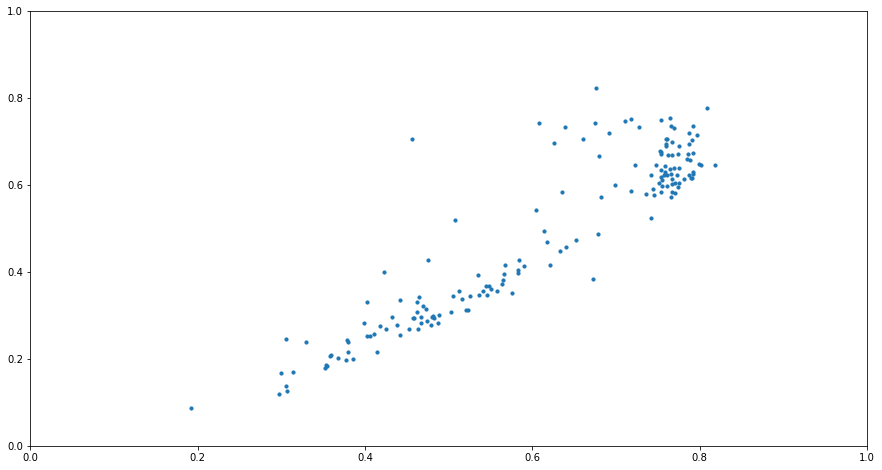

In [22]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(15, 8))
_ = ax0.scatter(-2.5*np.log10(rgb["FLUX7"])+2.5*np.log10(rgb["FLUX7_green"]), -2.5*np.log10(rgb["FLUX7_green"])+2.5*np.log10(rgb["FLUX7_red"]), s=10)
ax0.set_xlim([0,1])
ax0.set_ylim([0,1])

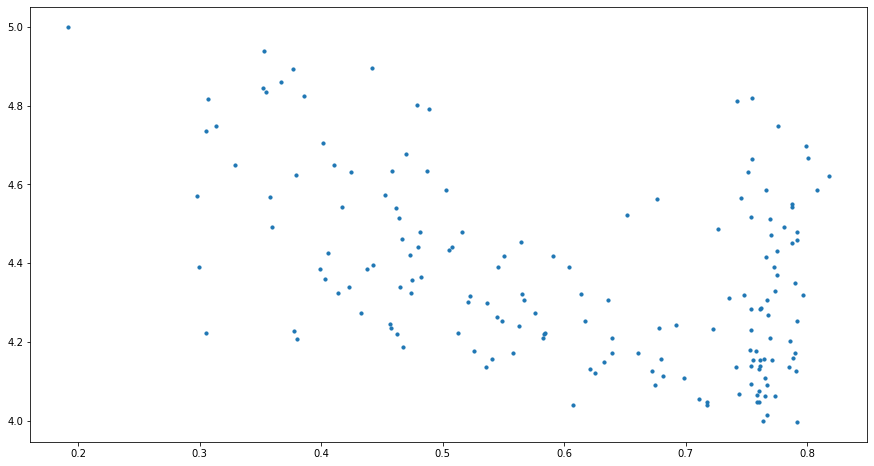

In [23]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(15, 8))
_ = ax0.scatter(-2.5*np.log10(rgb["FLUX7"])+2.5*np.log10(rgb["FLUX7_green"]), np.log10(rgb["FLUX7_green"]), s=10)
#ax0.set_xlim([0,1])

In [20]:
rgb

DATE_OBS_red,NAME,FILTER_red,CATRA_red,CATDEC_red,IMGRA_red,IMGDEC_red,IMGX_red,IMGY_red,<Gmag>_red,BKGROUND_red,BGSTDDEV_red,BGRJCT_red,PSF_A_red,PSF_SIGMAX_red,PSF_SIGMAY_red,PSF_THETA_red,PSF_MAD_red,FLUX5_red,FLUX6_red,FLUX7_red,SNR5_red,SNR6_red,SNR7_red,FLAG_red,DATE_OBS_green,FILTER_green,CATRA_green,CATDEC_green,IMGRA_green,IMGDEC_green,IMGX_green,IMGY_green,<Gmag>_green,BKGROUND_green,BGSTDDEV_green,BGRJCT_green,PSF_A_green,PSF_SIGMAX_green,PSF_SIGMAY_green,PSF_THETA_green,PSF_MAD_green,FLUX5_green,FLUX6_green,FLUX7_green,SNR5_green,SNR6_green,SNR7_green,FLAG_green,DATE_OBS,FILTER,CATRA,CATDEC,IMGRA,IMGDEC,IMGX,IMGY,<Gmag>,BKGROUND,BGSTDDEV,BGRJCT,PSF_A,PSF_SIGMAX,PSF_SIGMAY,PSF_THETA,PSF_MAD,FLUX5,FLUX6,FLUX7,SNR5,SNR6,SNR7,FLAG
float64,str20,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
2459101.42939,_2178369822978766080,B,324.142888,57.348211,324.142902,57.348184,483.885,948.362,13.58,530.2429,6.998277,0.4148,0.7507679,3.20245176,2.49306851,55.450333,0.00435923,62589.518,65910.911,67835.476,248.2789,254.076,256.9078,0,2459101.36585,B,324.142888,57.348211,324.142808,57.348244,483.865,948.37,13.58,354.2425,5.334155,0.7659,0.3318361,3.20499926,2.96648039,24.093645,0.00489359,32022.988,33914.398,34939.443,177.4088,182.0124,184.0589,0,2459101.39971,B,324.142888,57.348211,324.142796,57.348209,483.962,948.321,13.58,349.3509,5.308014,0.6299,0.1623478,3.36929606,2.79463121,35.721417,0.00681811,15517.954,16424.08,16916.455,122.4082,125.1571,126.0851,0
2459101.42939,_2178369891698359040,B,324.19372,57.369959,324.193715,57.369938,400.138,902.981,14.64,529.9743,6.998277,0.4148,0.2909153,3.19113994,2.52345806,57.712941,0.0076558,24561.493,25854.64,26604.881,153.7403,156.6533,157.6222,0,2459101.36585,B,324.19372,57.369959,324.193623,57.370002,400.11,902.988,14.64,355.2486,5.334155,0.7659,0.1441117,3.21399469,2.90519561,22.705696,0.00880668,13748.505,14545.343,15003.697,114.9419,117.401,118.2504,0,2459101.39971,B,324.19372,57.369959,324.193643,57.369966,400.166,902.957,14.64,349.8715,5.308014,0.6299,0.0708611,3.39337733,2.77959656,35.458345,0.0112238,6821.9096,7238.8171,7467.8382,79.43672,80.75373,80.75278,0
2459101.42939,_2178369926058157312,B,324.219447,57.381659,324.219459,57.381648,357.409,878.121,14.883,530.3887,6.998277,0.4148,0.2286998,3.21176989,2.53810138,58.551114,0.00867879,19522.773,20551.696,21110.114,136.4048,138.76,139.2113,0,2459101.36585,B,324.219447,57.381659,324.219368,57.381703,357.383,878.153,14.883,355.9791,5.334155,0.7659,0.1650008,3.20287949,2.88550711,23.778292,0.00643301,15572.116,16399.599,16866.313,122.6082,125.0308,125.8493,0,2459101.39971,B,324.219447,57.381659,324.219474,57.381653,357.331,878.185,14.883,350.537,5.308014,0.6299,0.115038,3.3869905,2.77688772,34.595178,0.0082188,10986.4,11584.012,11908.61,102.2727,104.1088,104.4739,0
2459101.42939,_2178392195466994048,B,324.353531,57.353294,324.353618,57.353222,176.609,988.116,14.473,487.9457,6.998277,0.4148,0.3456349,3.26923383,2.5950357,54.914244,0.00884246,31236.482,33265.679,34714.339,174.0791,178.7071,181.4568,0,2459101.36585,B,324.353531,57.353294,324.35348,57.35331,176.618,988.124,14.473,356.0459,5.334155,0.7659,0.1629808,3.73860474,3.03356165,29.459947,0.0103608,18092.693,19457.336,20266.579,132.4792,136.6923,138.6639,0,2459101.39971,B,324.353531,57.353294,324.353536,57.353285,176.591,988.116,14.473,350.757,5.308014,0.6299,0.0956542,3.74765238,2.86964502,35.649494,0.0106605,10194.747,10891.253,11285.949,98.3362,100.7418,101.4726,0
2459101.42939,_21